In [3]:
from numpy            import mean
from numpy            import cov
from numpy            import zeros
from numpy            import cumsum
from numpy            import argmax
from numpy.linalg     import inv
from scipy.linalg     import svd
from matplotlib       import pyplot
from sklearn.datasets import fetch_olivetti_faces
import matplotlib
import random
x , y = fetch_olivetti_faces(return_X_y = True)
## ----------------------------PCA_Function---------------------------- 
def pca(matrix , n_components):
    m = mean(matrix ,axis=0)
    xmT = (matrix - m).T
    ## cov(x,y) = sum((x-mx) * (y-my))/n-1
    u,s,v = svd(cov(xmT))
    # s , u = eig(cov(xmT))
    uk = u[:,:n_components]
    p = xmT.T.dot(uk)
    return p , s , (p.dot(uk.T) + m)
## ------------------------imshow_to_Function-------------------------
def show(images , components , rows = 8 , columns = 8 , dimentions = 15):
    if rows * columns > 400 or rows * columns < 0:
        print("ERR: Selected shape isn't in range of 400")
        rows = 8
        columns = 8
    _ , _ , recovered = pca(images , components)
    # rnd = array(random.sample(range(400), rows * columns)).reshape(rows,columns)
    rnd = random.sample(range(400), rows * columns)
    extcol = 2 * columns + 1
    pyplot.figure(figsize=(2 * dimentions,dimentions))
    for i in range(rows):
        for j in range(columns):
            pyplot.subplot(rows, extcol , i * extcol + j + 1)
            pyplot.imshow(images.reshape(400,64,64)[rnd[i*columns+j]] , aspect='auto' , cmap=pyplot.cm.gray)
            pyplot.axis("off")
            pyplot.subplot(rows , extcol , i * extcol + j + columns + 2)
            pyplot.imshow(recovered.reshape(400,64,64)[rnd[i*columns+j]] , aspect='auto' , cmap=pyplot.cm.gray)
            pyplot.axis("off")
        pyplot.subplot(rows, extcol , i * extcol + columns + 1)
        pyplot.imshow(zeros([1,1]) , aspect='auto' , cmap=pyplot.cm.gray)
        pyplot.axis("off")
    pyplot.subplots_adjust(hspace=0, wspace=0)
    pyplot.show()
## ---------------------------pca_least_rmse---------------------------
def components_rmse(values , rmse_percentage = 0 , chart = False):
    if 0 > rmse_percentage > 100:
        rmse_percentage = 0
    rmse_percentage /= 100
    cmsm = cumsum(values)/sum(values)
    components = argmax(cmsm >= 1 - rmse_percentage) + 1
    txt = str(rmse_percentage * 100) + "% Data loss with " + str(components) + " components."
    if chart:
        pyplot.title(txt)
        pyplot.scatter(components , rmse_percentage * 100)
        pyplot.plot((1-cmsm) * 100 , color="red")
        # pyplot.scatter(components , (1-rmse_percentage) * 100,color="red")
        # pyplot.plot(cmsm * 100)
        pyplot.show()
    else:
        return txt

Sample of i*j original pictures and their reconstruction by n components:


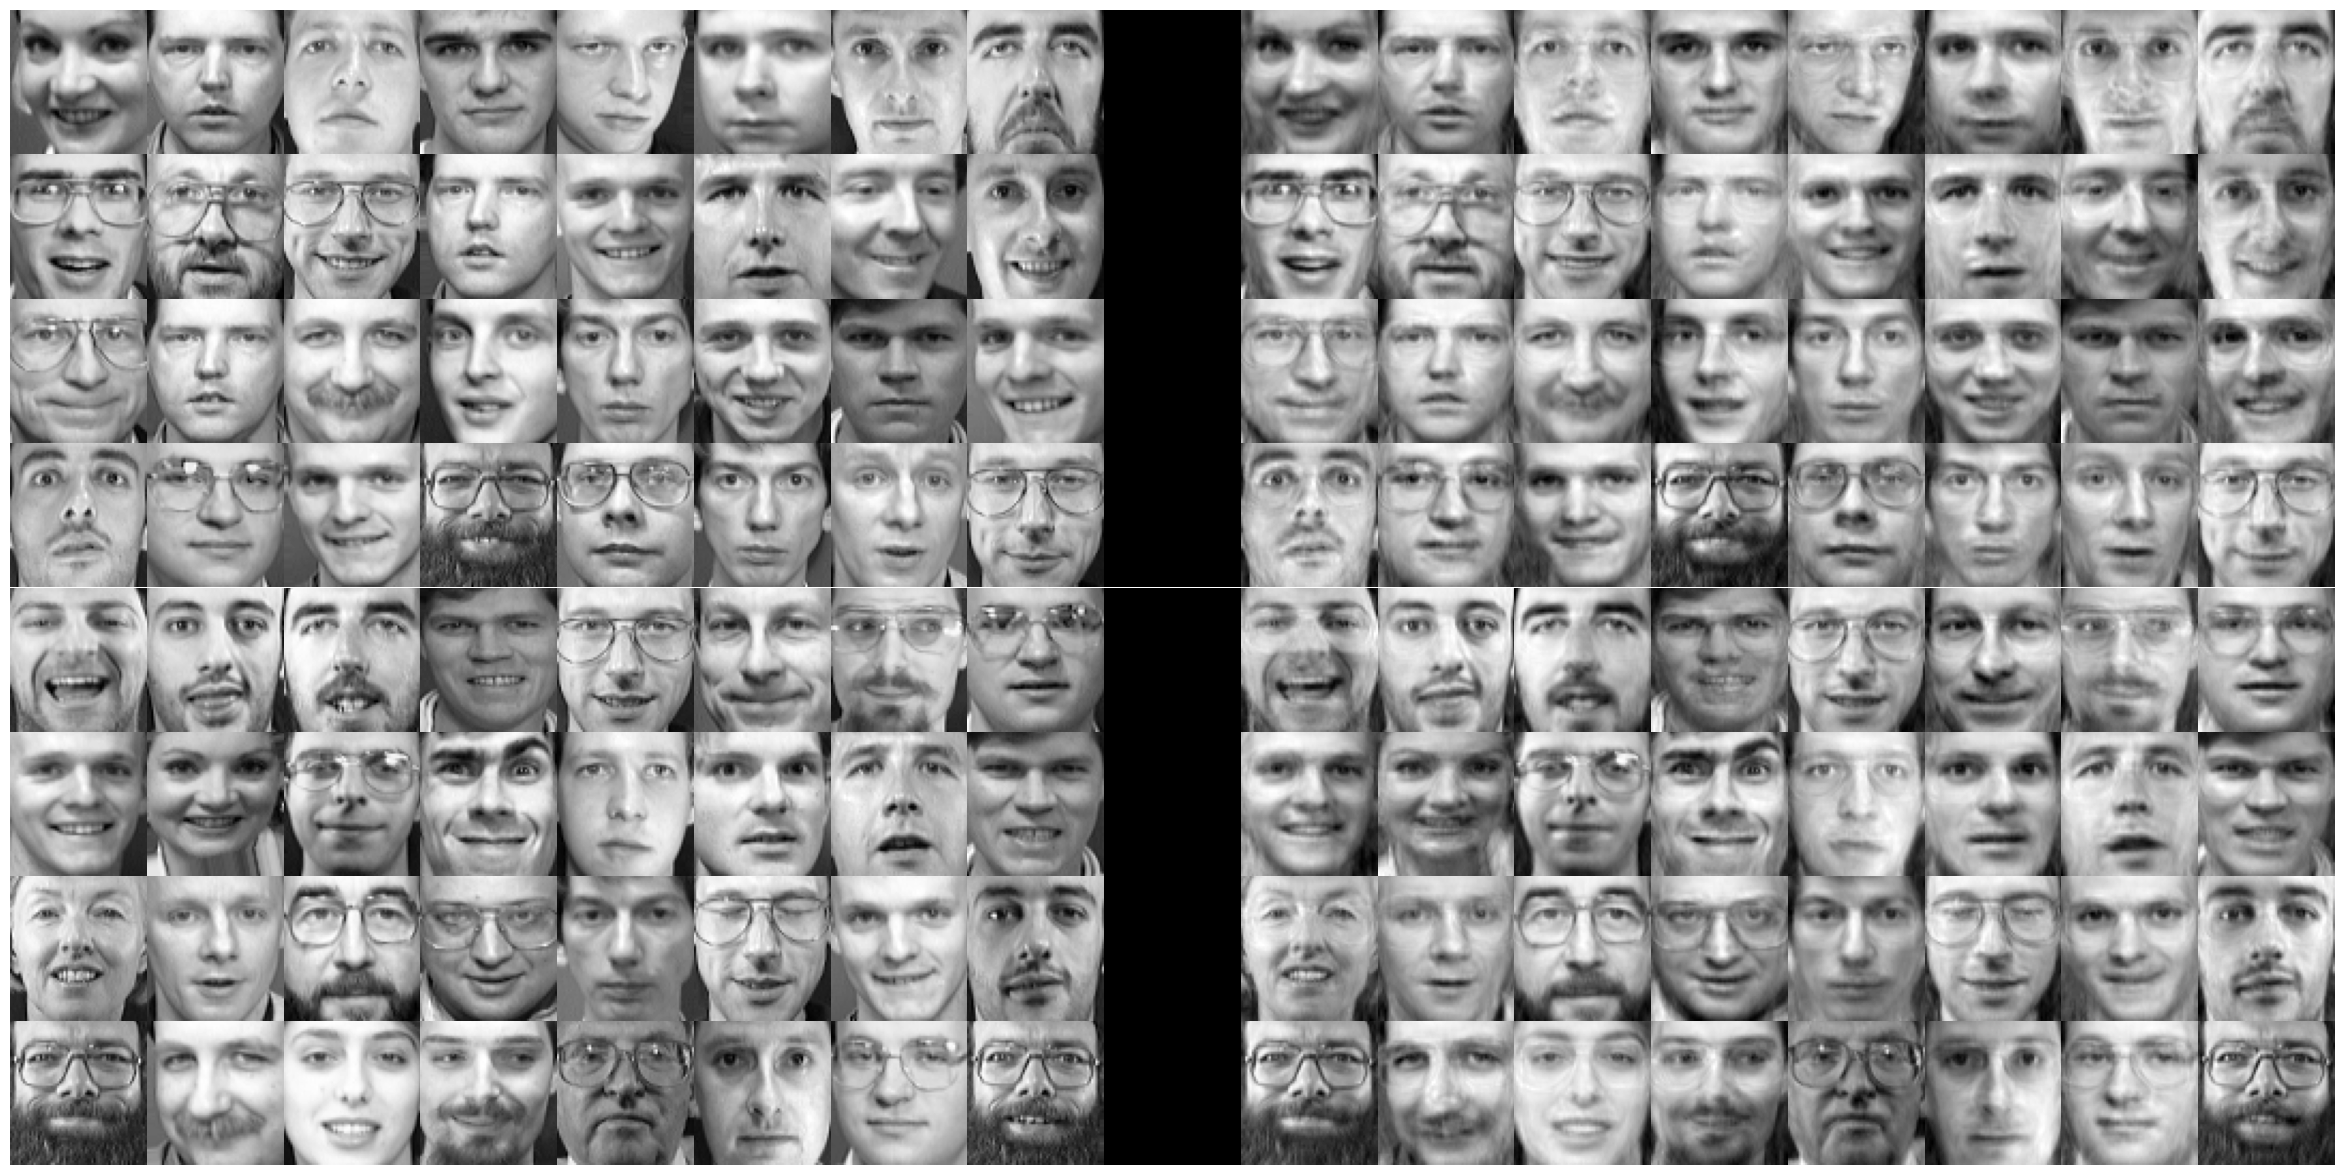

Linear Regression: RMSE of 100 components = 20.416858522621375 




In [12]:
print("Sample of i*j original pictures and their reconstruction by n components:")
show(x , 100)
## -------------------------Linear_Regression-------------------------
x1 , val , _ = pca(x,100)
a = inv(x1.T.dot(x1)).dot(x1.T).dot(y)
yc = x1.dot(a)
rmse = (sum(((yc - y)**2))/y.size)**0.5
print("Linear Regression: RMSE of 100 components =",rmse,"\n\n")

Measuring needed components based on RMSE:

100.0% Data loss with 1 components.
90.0% Data loss with 1 components.
80.0% Data loss with 1 components.
70.0% Data loss with 2 components.
60.0% Data loss with 3 components.
50.0% Data loss with 4 components.
40.0% Data loss with 8 components.
30.0% Data loss with 14 components.
20.0% Data loss with 27 components.
10.0% Data loss with 66 components.
8.0% Data loss with 83 components.
6.0% Data loss with 107 components.
4.0% Data loss with 143 components.
2.0% Data loss with 205 components.
0.0% Data loss with 400 components.


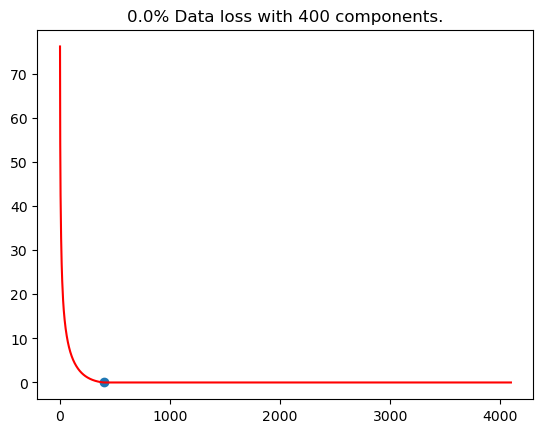

In [18]:
print("Measuring needed components based on RMSE:\n")
for i in range (100,10,-10):
    print(components_rmse(val, i))
for i in range (10,-1,-2):
    print(components_rmse(val, i))
components_rmse(val , 0 , True)